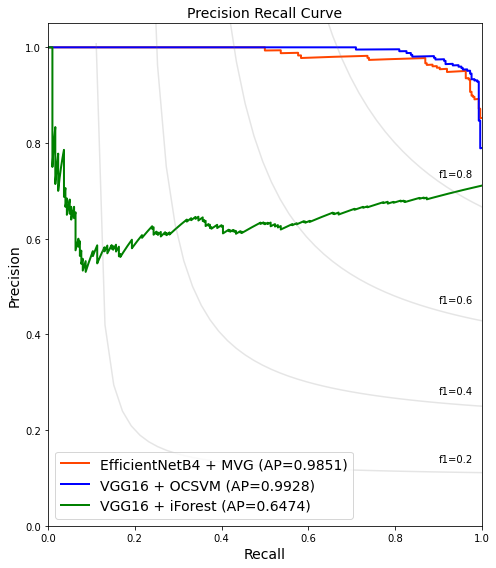

In [27]:
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import pickle
import matplotlib.pyplot as plt

import pickle
infile = open('mvg_effb4_p.lab','rb')
p_mvg = pickle.load(infile)
infile.close()

infile = open('mvg_effb4_dist','rb')
dist_mvg = pickle.load(infile)
infile.close()


infile = open('if_vgg16_p.lab','rb')
p_if = pickle.load(infile)
infile.close()

infile = open('if_vgg16_dist','rb')
dist_if = pickle.load(infile)
infile.close()

infile = open('svm_vgg16_p.lab','rb')
p_svm = pickle.load(infile)
infile.close()

infile = open('svm_vgg16_dist','rb')
dist_svm = pickle.load(infile)
infile.close()
plt.figure(figsize=(7, 8))

precision, recall, thresholds = precision_recall_curve(p_mvg, dist_mvg)
plt.plot(recall, precision, color='orangered', lw=2)

precision, recall, thresholds = precision_recall_curve(p_svm, dist_svm)
plt.plot(recall, precision, color='blue', lw=2)

precision, recall, thresholds = precision_recall_curve(p_if, dist_if)
plt.plot(recall, precision, color='green', lw=2)

f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')

plt.xlabel('Recall',fontsize=14)
plt.ylabel('Precision',fontsize=14)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
average_precision_mvg = average_precision_score(p_mvg, dist_mvg)
average_precision_svm = average_precision_score(p_svm, dist_svm)
average_precision_if = average_precision_score(p_if, dist_if)

plt.plot(average_precision_mvg,color='orangered', lw=2, label='EfficientNetB4 + MVG (AP={0:0.4f})'.format(average_precision_mvg))
plt.plot(average_precision_svm,color='blue', lw=2, label='VGG16 + OCSVM (AP={0:0.4f})'.format(average_precision_svm))
plt.plot(average_precision_if,color='green', lw=2, label='VGG16 + iForest (AP={0:0.4f})'.format(average_precision_if))
plt.title(
    'Precision Recall Curve', fontsize=14 )
plt.legend(loc="lower left", fontsize=14)
plt.tight_layout()
plt.savefig("Best_performing_PRC.svg", dpi=2160)
plt.show()

In [14]:
average_precision_mvg

0.9850594602389137